# DSM020 Python Programming CW1

Introduction

Nowadays people are spending more time in the workplace. Being sedentary in those who sat for more than 8 hours a day with no physical activity had a risk of dying similar to the risks of dying posed by obesity and smoking. Physical inactivity is a global public health problem. Insufficient physical activity is the 4th leading risk factor for mortality (World Health Organization 2018). Approximately 3.2 million deaths and 32.1 million DALYs (representing about 2.1% of global DALYs) each year are attributable to insufficient physical activity. People who are insufficiently physically active have a 20% to 30% increased risk of all-cause mortality compared to those who engage in at least 30 minutes of moderate intensity physical activity most days of the week (10) (World Health Organization 2018).

Nevertheless, not everyone has the same opportunity to be physically active. For example, many people live in a poor infrastructure may have little safe spaces for physical activity. During the Covid-19 quarantine, people are isolated in their house/ a small room for days or even months. Physical inactivity may effect feeling of anxiety, sleep quality, weight gain and many chronic diseases such as heart disease, cancer and type 2 diabetes(Physical Inactivity, CDC). 

Therefore, several large technology companies and start-ups including Apple, Xiaomi, Fitbit, and Garmin have have entered the healthcare market with the introduction of wearable devices that allow users to track their personal activities (e.g., daily steps, and sports activity) and various vital parameters (e.g., sleep patterns and heart rate). They calim that by recording activity levels to prompt users to change their behavior, these devices can support individuals’ efforts to improve their physical activity, sleep, and nutrition. 


Project Background

The data set in csv version is publicily shared on Kaggle. It is FitBit Fitness Tracker and obtained from a distributed survey via Amazon Mechanical Turk between April 12,2016 and May 12, 2016 with 18 csv files. In this project, I selected three of them to analyse data which are sleepDay, dailyActivity and weightLogInfo.

I used to wear Xiaomi Mi band to track my sleep quality sometimes and heart rate during exercise. Usually, I do exercise twice a week and take a 30 minutes walk daily. Everytime I wear Mi band I want to know if my heart rate has increased to 180 which is the maximum heart rate to burn calories according to my age. However, my routine has been disrupted during Shanghai Lockdown on April 2022. The quarantine has unexpectedly maintained about two months. We are only allowed to stay in our house and cannot go out to buy any food during the time. This unusal experience of isolation, physical inactivity and unpredictable environment have caused my stress, anxiety and sleep problem. Therefore, when I read the dataset and I would like to discover some interesting findings between physical activity tracker and health behaviour. 

Objectives/ Interesting findings that I want to discover

- How active are user's days? Do they spend a considerable amount of time being sedentary?
- Is any coefficient between BMI and sleeptime?
- Any difference between weekday or weekend?
- Understand the sleep stages and find out what it takes to get a better deep sleep.

Limitation of the project

I found that there are several limitations about the dataset. First of all, we cannot discuss further FitBit users’ behaviour from one month data. A further discussion we may ask how often did they wear FitBit? In any circumstance? Did they still wear FitBit after a month? If so, what is the reason they keep wearing FitBit? If not, why they end up wearing them?

Second, the dataset contained 33 users. We cannot receive their basic personal information like gender or age range. Also, why these 33 users? Finally, sleep is crucial to help people maintain mood and cognitive performance, store memories, lose weight and boost immune system etc. There are lots of benefits for people to have a good sleep. In addition, sleep cycle included light sleep, deep sleep and REM sleep is important for users to track their sleep quality. Unfortunately, we can only calculate users not sleep time but we are not sure about the users sleep quality.

Summary of key findings/insights
 
- People tend to spend more time in bed on weekend but not sleep. 
- The comparison bar chart of very activity and sedentary tells us that people spend more sedentary time whether it's weekdays or weekend.
- There is coefficient between BMI and sleeptime. 
- Steps amount and activity intensity are strongly correlated with calories. More activity can burn more calories.
- BMI is correlated with sedentary time and total time in bed.

Conclusion and further work

- Unfortunately, we will not be able to userdtand the reasons of why people not sleep on weekend. This is interesting to know what factors can affect sleep quality? They were probably watching Netflix or hanging out with friends.  
- There are some findings to train a simple Machine Learning model to see if there is a hidden pattern to attain better sleep.
- Given the increasing popularity of wearables and the pursuing to improve better both mental and physical health, we requires a better understanding of the comparison of wearable use patterns to explain why some users end up changing their behavior and others do not. 

Reading Resources:

https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3416
https://www.cdc.gov/chronicdisease/resources/publications/factsheets/physical-activity.htm
https://www.hopkinsmedicine.org/health/conditions-and-diseases/risks-of-physical-inactivity
https://www.sleepfoundation.org/how-sleep-works
https://www.forbes.com/sites/nicolefisher/2019/03/06/americans-sit-more-than-anytime-in-history-and-its-literally-killing-us/?sh=29ca743779d6
https://www.calculator.net/bmi-calculator.html

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.optimize import curve_fit
from scipy.stats import linregress 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import statsmodels.api as sm

# 1. Sleep Analysis

In [105]:
sleep = pd.read_csv('sleepDay.csv')
sleep

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [43]:
# check if there is any missing data
sleep.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [44]:
sleep.shape

(413, 5)

In [ ]:
# Check data type

sleep.info()

In [106]:
# Caculate not sleep time
sleep['NotSleepTime'] =sleep['TotalTimeInBed']-sleep['TotalMinutesAsleep']
print(sleep)

             Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  4/12/2016 12:00:00 AM                  1                 327   
1    1503960366  4/13/2016 12:00:00 AM                  2                 384   
2    1503960366  4/15/2016 12:00:00 AM                  1                 412   
3    1503960366  4/16/2016 12:00:00 AM                  2                 340   
4    1503960366  4/17/2016 12:00:00 AM                  1                 700   
..          ...                    ...                ...                 ...   
408  8792009665  4/30/2016 12:00:00 AM                  1                 343   
409  8792009665   5/1/2016 12:00:00 AM                  1                 503   
410  8792009665   5/2/2016 12:00:00 AM                  1                 415   
411  8792009665   5/3/2016 12:00:00 AM                  1                 516   
412  8792009665   5/4/2016 12:00:00 AM                  1                 439   

     TotalTimeInBed  NotSle

In [ ]:
sleep.describe()

In [221]:
# 24 users we have 

sleep['Id']=sleep['Id'].astype(str)
users_slp=sleep.groupby('Id',as_index=False)['TotalTimeInBed'].max()
users_slp

,Id,TotalTimeInBed
0,1503960366,712
1,1644430081,961
2,1844505072,961
3,1927972279,775
4,2026352035,607
5,2320127002,69
6,2347167796,602
7,3977333714,626
8,4020332650,541
9,4319703577,722


<AxesSubplot:xlabel='Id', ylabel='NotSleepTime'>

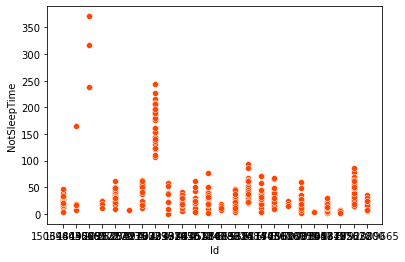

In [47]:
sns.scatterplot(x=sleep['Id'],y=sleep['NotSleepTime'],color='orangered')

<function matplotlib.pyplot.show(close=None, block=None)>

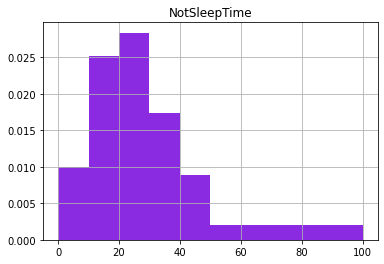

In [99]:
#NotSleepTime is not Gaussian distribution

sleep.hist(column='NotSleepTime',bins=[0,10,20,30,40,50,100],density=True, color='blueviolet')
plt.show

In [ ]:
# Prove this by running a statistical test and interpreting the p-value

In [100]:
import scipy.stats as stats

sleep['NotSleepTime'] = stats.norm.rvs(size =413)
stats.normaltest(sleep['NotSleepTime'])
# P-value >0.05, not normal distribution 

NormaltestResult(statistic=0.058661515792627315, pvalue=0.9710952139313778)

## Check sleep time between weekday and weekend 

In [108]:
# Check if day id weekday or weekend

sample_date = pd.Timestamp(2016,4,12)
# get the weekday
print(sample_date.weekday())
#check if it's a weekend or not
print(sample_date.weekday() >= 5)

1
False


In [109]:
# Check if each date in sleepDay column is a weekday or weekend

# convert to datetime
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
# determin the day of the week. 0 is donated to Monday and 6 is donated to Sunday
sleep['DayOfWeek'] = sleep['SleepDay'].dt.weekday
print(sleep)

             Id   SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366 2016-04-12                  1                 327   
1    1503960366 2016-04-13                  2                 384   
2    1503960366 2016-04-15                  1                 412   
3    1503960366 2016-04-16                  2                 340   
4    1503960366 2016-04-17                  1                 700   
..          ...        ...                ...                 ...   
408  8792009665 2016-04-30                  1                 343   
409  8792009665 2016-05-01                  1                 503   
410  8792009665 2016-05-02                  1                 415   
411  8792009665 2016-05-03                  1                 516   
412  8792009665 2016-05-04                  1                 439   

     TotalTimeInBed  NotSleepTime  DayOfWeek  
0               346            19          1  
1               407            23          2  
2               442           

In [110]:
# use boolean condition 

sleep['IsWeekend'] = sleep['DayOfWeek'] >= 5
sleep['IsWeekday'] = sleep['DayOfWeek'] < 5
print(sleep)

             Id   SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366 2016-04-12                  1                 327   
1    1503960366 2016-04-13                  2                 384   
2    1503960366 2016-04-15                  1                 412   
3    1503960366 2016-04-16                  2                 340   
4    1503960366 2016-04-17                  1                 700   
..          ...        ...                ...                 ...   
408  8792009665 2016-04-30                  1                 343   
409  8792009665 2016-05-01                  1                 503   
410  8792009665 2016-05-02                  1                 415   
411  8792009665 2016-05-03                  1                 516   
412  8792009665 2016-05-04                  1                 439   

     TotalTimeInBed  NotSleepTime  DayOfWeek  IsWeekend  IsWeekday  
0               346            19          1      False       True  
1               407            23

## People tend to spend more time in bed on weekends but not sleep

In [111]:
DayWkGroup= sleep.groupby(['DayOfWeek']).mean()
DayWkGroup

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,NotSleepTime,IsWeekend,IsWeekday
DayOfWeek,,,,,,
0,1.106383,418.829787,456.170213,37.340426,0.0,1.0
1,1.107692,404.538462,443.292308,38.753846,0.0,1.0
2,1.151515,434.681818,470.030303,35.348485,0.0,1.0
3,1.030769,402.369231,435.800000,33.430769,0.0,1.0
4,1.070175,405.421053,445.052632,39.631579,0.0,1.0
5,1.189655,420.810345,461.275862,40.465517,1.0,0.0
6,1.181818,452.745455,503.509091,50.763636,1.0,0.0


In [112]:
WdayendNotSlpGrp= sleep.groupby(['IsWeekday']).mean()
WdayendNotSlpGrp

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,NotSleepTime,DayOfWeek,IsWeekend
IsWeekday,,,,,,
False,1.185841,436.353982,481.831858,45.477876,5.486726,1.0
True,1.093333,413.106667,449.903333,36.796667,2.066667,0.0


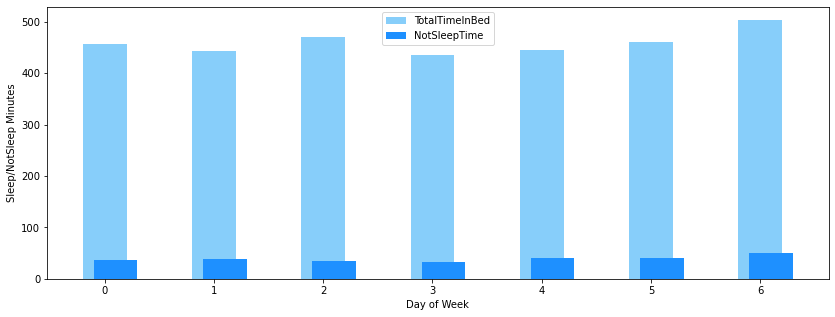

In [113]:
# Sleep or NotSleep  

fig = plt.figure(figsize = (14,5))
plt.bar((DayWkGroup.index), DayWkGroup['TotalTimeInBed'],width = 0.4, color='lightskyblue', label="TotalTimeInBed")
plt.bar((DayWkGroup.index+0.1), DayWkGroup['NotSleepTime'], width = 0.4, color='dodgerblue', label="NotSleepTime")
plt.xlabel('Day of Week')
plt.ylabel('Sleep/NotSleep Minutes')
plt.legend()

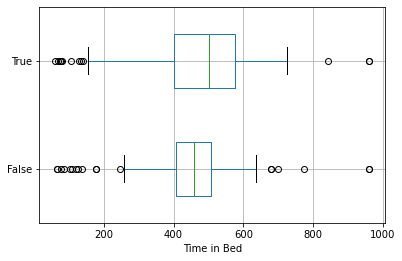

In [82]:
ax = sleep.boxplot(column = 'TotalTimeInBed', by = 'IsWeekend', vert = False, widths = 0.5)
plt.xlabel('Time in Bed')
plt.suptitle('')
plt.title('');

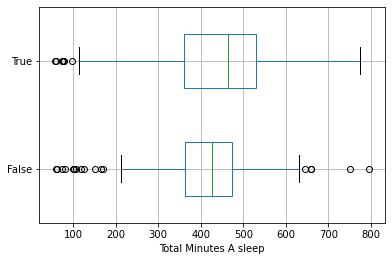

In [30]:
ax = sleep.boxplot(column = 'TotalMinutesAsleep', by = 'IsWeekend', vert = False, widths = 0.5)
plt.xlabel('Total Minutes A sleep')
plt.suptitle('')
plt.title('');

# from mean, sleep at weekend is about 460 mins. 
# longer than weekdays 420mins

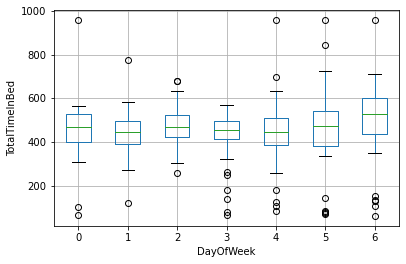

In [83]:
ax = sleep.boxplot(column = 'TotalTimeInBed', by = 'DayOfWeek')
plt.ylabel('TotalTimeInBed')
plt.suptitle('')
plt.title('');

In [32]:
# It's obvious that total time in bed on Friday (4),Saturday(5) and Sunday(6) have more deviation
# Thursday(3) has more condensed data.  

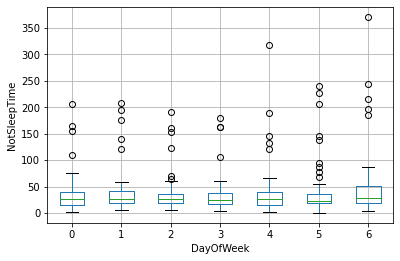

In [114]:
ax = sleep.boxplot(column = 'NotSleepTime', by = 'DayOfWeek')
plt.ylabel('NotSleepTime')
plt.suptitle('')
plt.title('');

In [ ]:
# Same as NotSleepTime but Saturday has more outliers above maximum value

# 2. Activity Analysis

In [236]:
activity=pd.read_csv('dailyActivity.csv')
print(activity)

             Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    4/12/2016       13162       8.500000         8.500000   
1    1503960366    4/13/2016       10735       6.970000         6.970000   
2    1503960366    4/14/2016       10460       6.740000         6.740000   
3    1503960366    4/15/2016        9762       6.280000         6.280000   
4    1503960366    4/16/2016       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391     5/8/2016       10686       8.110000         8.110000   
936  8877689391     5/9/2016       20226      18.250000        18.250000   
937  8877689391    5/10/2016       10733       8.150000         8.150000   
938  8877689391    5/11/2016       21420      19.559999        19.559999   
939  8877689391    5/12/2016        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0       

In [34]:
# Check any missing value
activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [237]:
# Check data type
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [159]:
activity.shape

(940, 16)

In [238]:
# Check if day id weekday or weekend

activity_date = pd.Timestamp(2016,4,12)
# get the weekday
print(activity_date.weekday())
#check if it's a weekend or not
print(activity_date.weekday() >= 5)

1
False


In [239]:
# convert to datetime
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
# determin the day of the week. 0 is donated to Monday and 6 is donated to Sunday
activity['AcDayOfWeek'] = activity['ActivityDate'].dt.weekday
print(activity)

             Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0       

In [240]:
# Check if the day is weekend or not
# use boolean condition 

activity['IsWeekend'] = activity['AcDayOfWeek'] >= 5
activity['IsWeekday'] = activity['AcDayOfWeek'] < 5
print(activity)

             Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0       

In [241]:
AcWkGroup= activity.groupby(['AcDayOfWeek']).mean()
AcWkGroup

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,IsWeekend,IsWeekday
AcDayOfWeek,,,,,,,,,,,,,,,,
0,4.859930e+09,7780.866667,5.552917,5.528750,0.224552,1.537333,0.585833,3.363083,0.002583,23.108333,14.000000,192.058333,1027.941667,2324.208333,0.0,1.0
1,4.851063e+09,8125.006579,5.832237,5.812829,0.169054,1.613289,0.593026,3.471053,0.001447,22.953947,14.335526,197.342105,1007.361842,2356.013158,0.0,1.0
2,4.815191e+09,7559.373333,5.488333,5.467600,0.139588,1.633467,0.527067,3.256333,0.001333,20.780000,13.100000,189.853333,989.480000,2302.620000,0.0,1.0
3,4.837277e+09,7405.836735,5.312245,5.287415,0.129283,1.390476,0.505170,3.283129,0.002313,19.408163,11.959184,185.421769,961.993197,2199.571429,0.0,1.0
4,4.880997e+09,7448.230159,5.309921,5.302936,0.072186,1.312937,0.483810,3.489127,0.001825,20.055556,12.111111,204.198413,1000.309524,2331.785714,0.0,1.0
5,4.908075e+09,8152.975806,5.854677,5.854677,0.000000,1.514597,0.677339,3.617177,0.001048,21.919355,15.201613,207.145161,964.282258,2354.967742,1.0,0.0
6,4.847640e+09,6933.231405,5.027190,5.027190,0.000000,1.488926,0.618017,2.892314,0.000661,19.983471,14.528926,173.975207,990.256198,2263.000000,1.0,0.0


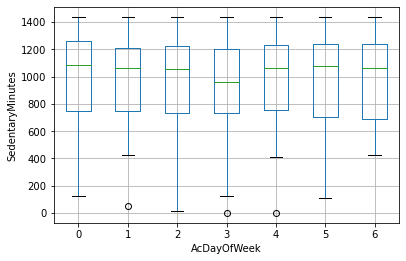

In [215]:
ax = activity.boxplot(column = 'SedentaryMinutes', by = 'AcDayOfWeek')
plt.ylabel("SedentaryMinutes")
plt.suptitle('')
plt.title('');

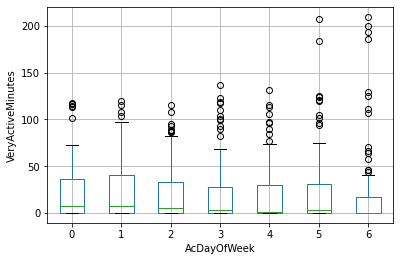

In [216]:
ax = activity.boxplot(column = 'VeryActiveMinutes', by = 'AcDayOfWeek')
plt.ylabel("VeryActiveMinutes")
plt.suptitle('')
plt.title('');

In [ ]:
# For VeryActiveMinutes, Sunday has more obvious deviation and condensed box. Less than 20 mins
# Required more data about the types of activity to tell the wide range of deviation  

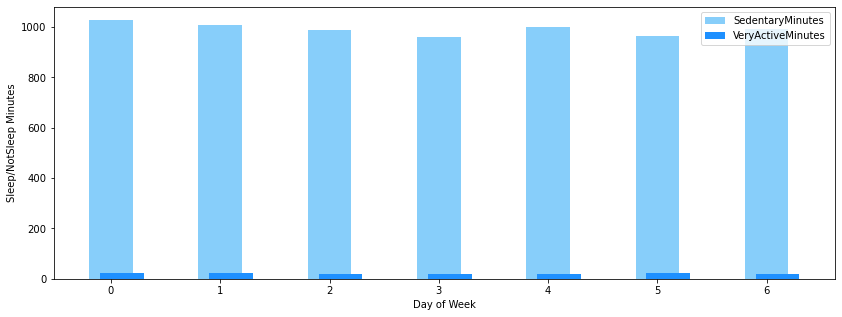

In [178]:
# VeryActive or Sedentary 

fig = plt.figure(figsize = (14,5))
plt.bar((AcWkGroup.index),AcWkGroup['SedentaryMinutes'] ,width = 0.4, color='lightskyblue', label="SedentaryMinutes")
plt.bar((AcWkGroup.index+0.1), AcWkGroup['VeryActiveMinutes'], width = 0.4, color='dodgerblue', label="VeryActiveMinutes")
plt.xlabel('Day of Week')
plt.ylabel('Sleep/NotSleep Minutes')
plt.legend()

In [ ]:
# It's straightforward saying people spend more time on sedentary whether it's weekdays or weekend. 
# I would say the sedentary time may include sleep time because more than 10 hours by dividing 60. However,
# there is no direct data can prove it. 

In [222]:
# Restructuring data by grouping activity Id and merge with NotSleepTime
# to compare with 

activity['Id']=activity['Id'].astype(str)
users_act = activity.groupby('Id',as_index=False)['VeryActiveMinutes'].max()
users_act

,Id,VeryActiveMinutes
0,1503960366,78
1,1624580081,186
2,1644430081,51
3,1844505072,2
4,1927972279,16
5,2022484408,104
6,2026352035,3
7,2320127002,20
8,2347167796,66
9,2873212765,75


## Merge NotSleepTime and Activity data

In [223]:
# merge 
slp_activity = users_act.merge(users_slp,on='Id',how='left')
slp_activity

,Id,VeryActiveMinutes,TotalTimeInBed
0,1503960366,78,712.0
1,1624580081,186,NaN
2,1644430081,51,961.0
3,1844505072,2,961.0
4,1927972279,16,775.0
5,2022484408,104,NaN
6,2026352035,3,607.0
7,2320127002,20,69.0
8,2347167796,66,602.0
9,2873212765,75,NaN


In [197]:
activity.corr(method='pearson')

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,1.000000,0.185721,0.241000,0.238816,0.188015,0.308691,0.026665,0.019629,-0.015698,0.303608,0.051158,-0.098754,-0.043319,0.396671
TotalSteps,0.185721,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,0.591568
TotalDistance,0.241000,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.644962
TrackerDistance,0.238816,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.645313
LoggedActivitiesDistance,0.188015,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.207595
VeryActiveDistance,0.308691,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.491959
ModeratelyActiveDistance,0.026665,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,0.216790
LightActiveDistance,0.019629,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,0.466917
SedentaryActiveDistance,-0.015698,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.043652
VeryActiveMinutes,0.303608,0.667079,0.681297,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,0.615838


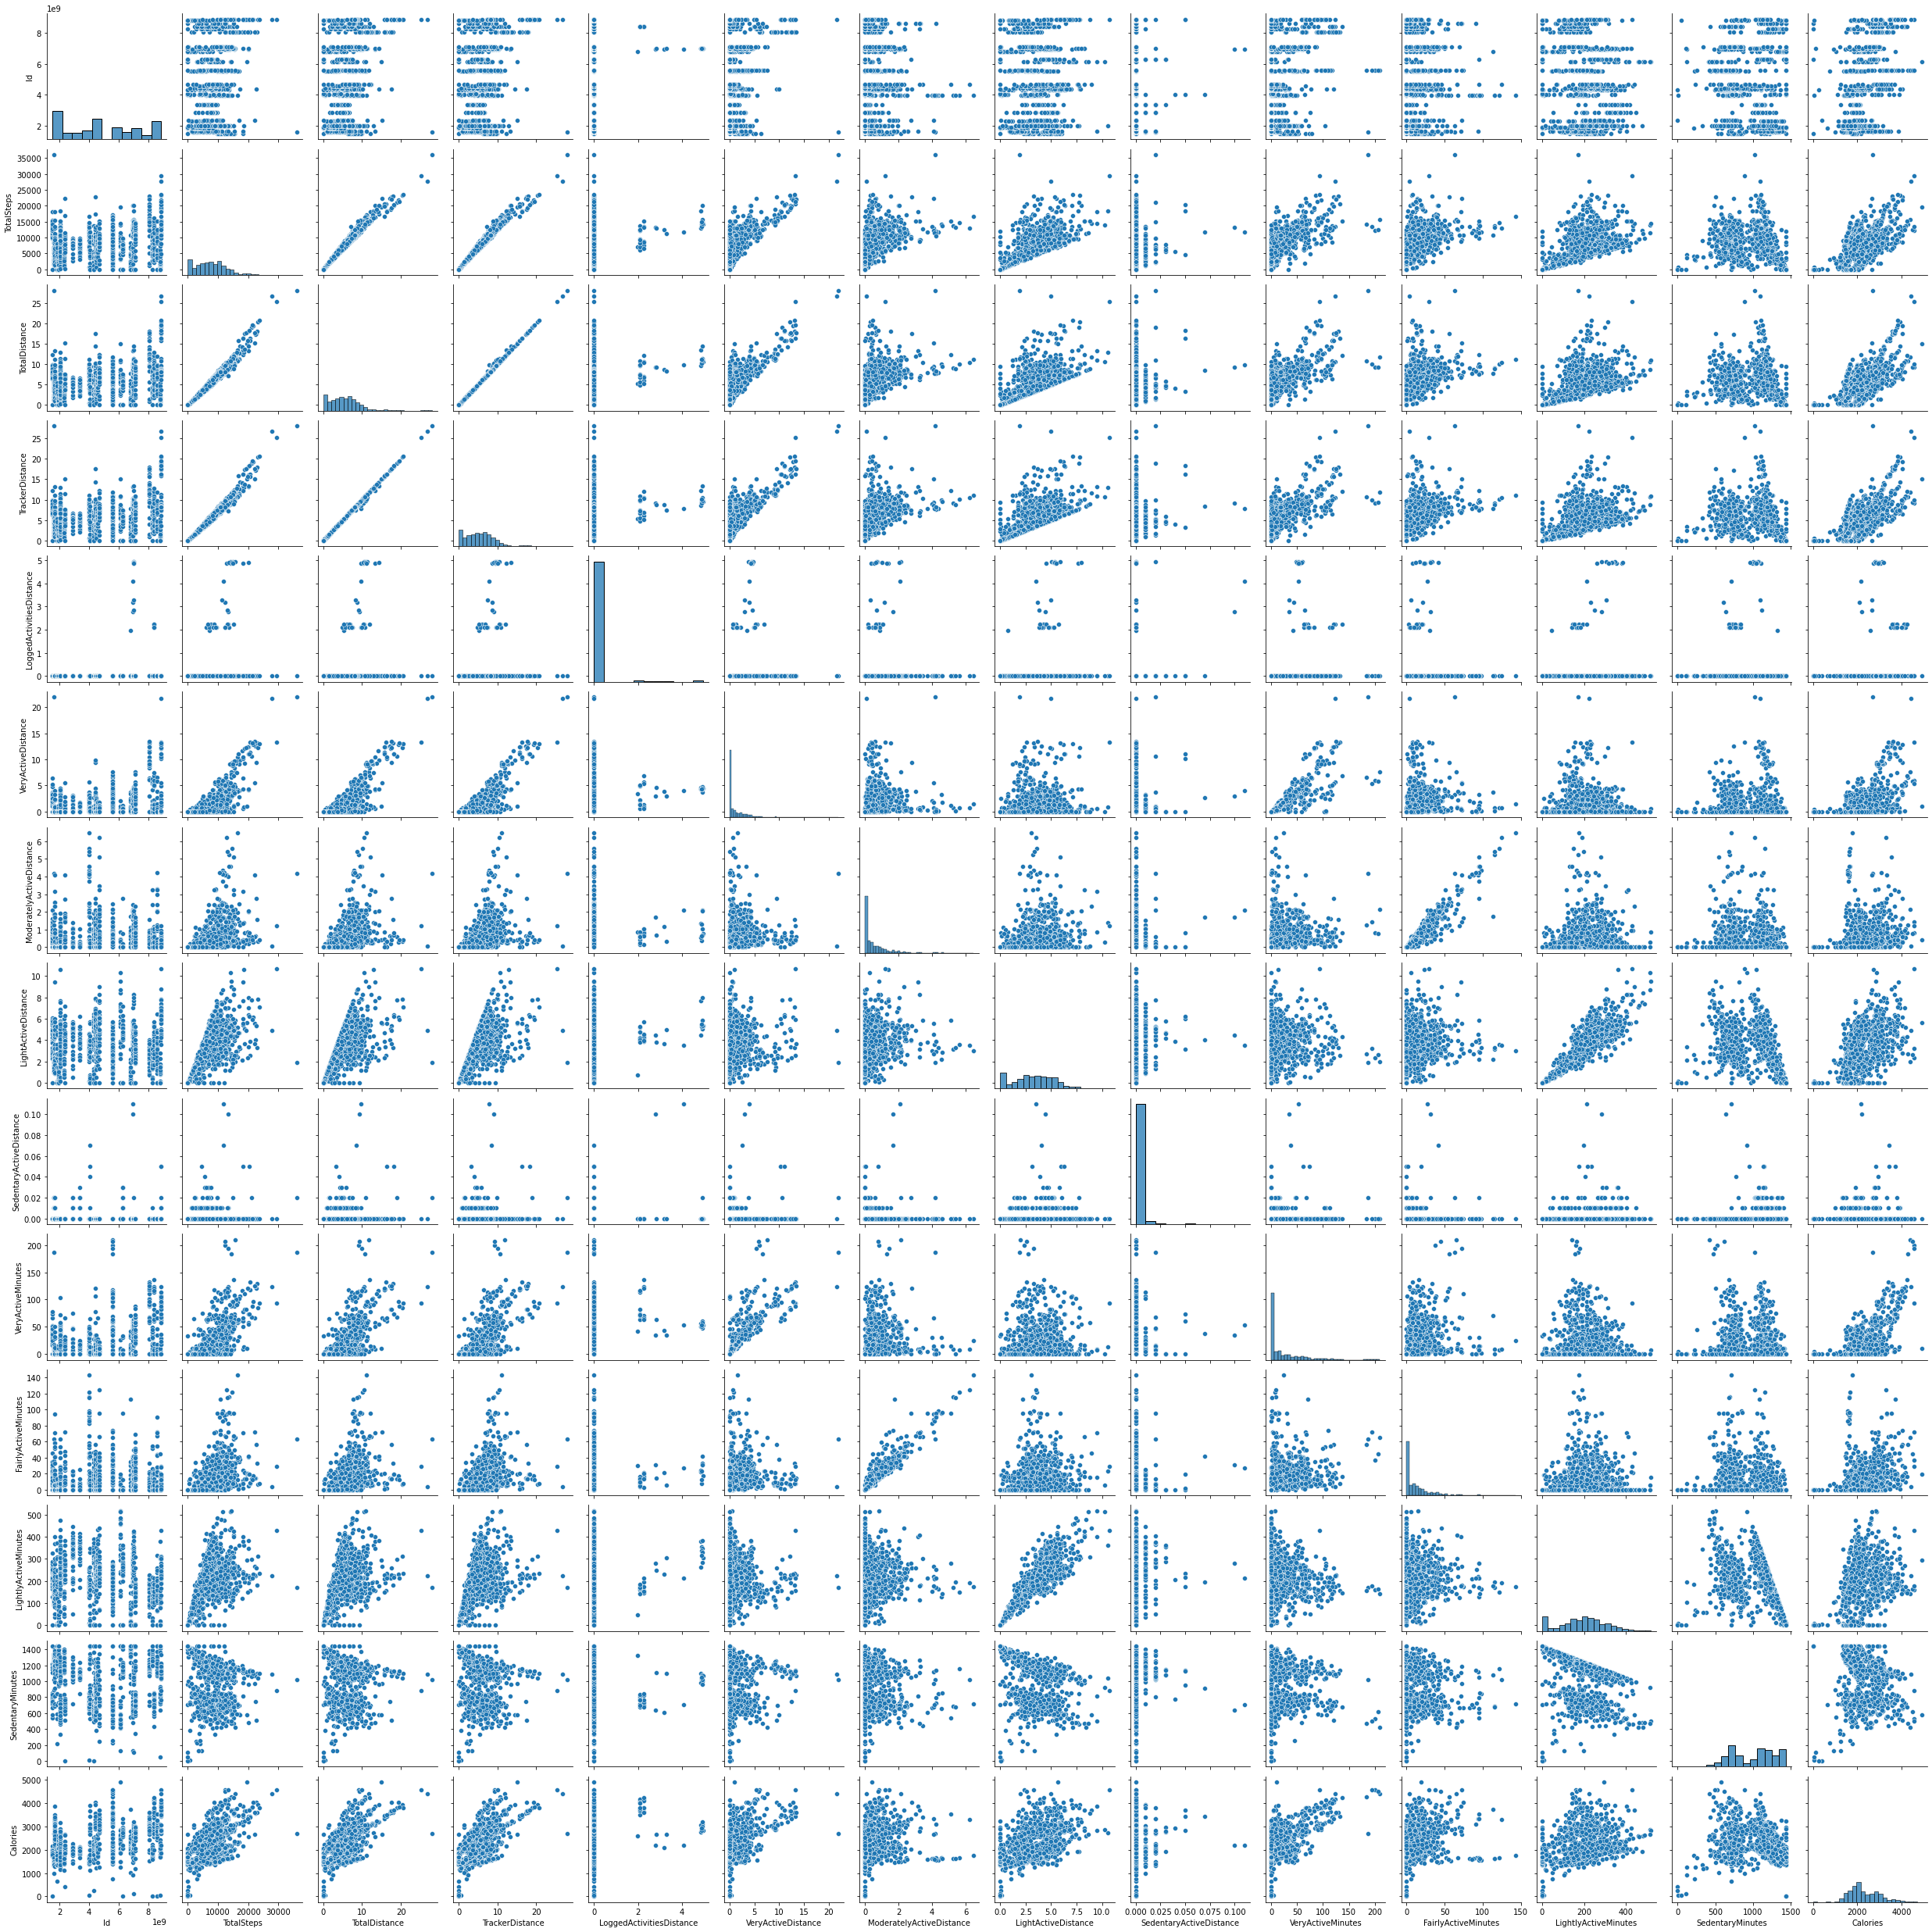

In [198]:
# overrall correlogram

sns.pairplot(activity)
plt.show()

## Sedentary Minutes

Text(0.5, 1.0, 'Sedentary Minutes by Id')

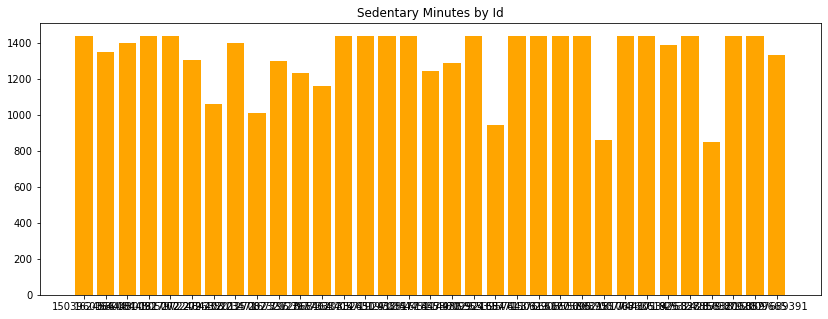

In [158]:
fig = plt.figure(figsize = (14,5))
plt.bar(activity['Id'],activity['SedentaryMinutes'], color ='orange')
plt.title("Sedentary Minutes by Id")

In [220]:
#activity['SedentaryMinutes'] = activity['SedentaryMinutes']/60
activity['SedentaryMinutes']

0       728
1       776
2      1218
3       726
4       773
       ... 
935    1174
936    1131
937    1187
938    1127
939     770
Name: SedentaryMinutes, Length: 940, dtype: int64

In [139]:
activity['Id']=activity['Id'].astype(str)
users_sed = activity.groupby('Id',as_index=False)['SedentaryMinutes'].max()
users_sed.mean()

Id                          inf
SedentaryMinutes    1321.757576
dtype: float64

In [230]:
# insert sed_proportion new column into activity 

SendentaryPropotion=activity.groupby('Id',as_index=False).max()
SendentaryPropotion

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,5/9/2016,18134,12.210000,12.210000,0.000000,6.40,2.12,6.06,0.00,78,46,328,1440,2159
1,1624580081,5/9/2016,36019,28.030001,28.030001,0.000000,21.92,4.19,5.91,0.02,186,63,236,1349,2690
2,1644430081,5/9/2016,18213,13.240000,13.240000,0.000000,4.10,4.09,9.46,0.02,51,94,402,1402,3846
3,1844505072,5/9/2016,8054,5.320000,5.320000,0.000000,0.14,0.52,5.23,0.00,2,13,373,1440,2130
4,1927972279,5/9/2016,3790,2.620000,2.620000,0.000000,1.16,0.40,2.60,0.00,16,9,192,1440,2638
5,2022484408,5/9/2016,18387,12.910000,12.910000,0.000000,4.55,1.93,10.57,0.00,104,63,361,1305,3158
6,2026352035,5/9/2016,12357,7.710000,7.710000,0.000000,0.19,0.35,7.71,0.00,3,8,475,1062,1926
7,2320127002,5/9/2016,10725,7.490000,7.490000,0.000000,1.49,0.49,6.01,0.00,20,11,335,1400,2124
8,2347167796,4/29/2016,22244,15.080000,15.080000,0.000000,5.45,4.10,7.15,0.00,66,72,382,1011,2670
9,2873212765,5/9/2016,9685,6.650000,6.650000,0.000000,3.11,1.41,5.69,0.02,75,23,448,1302,2241


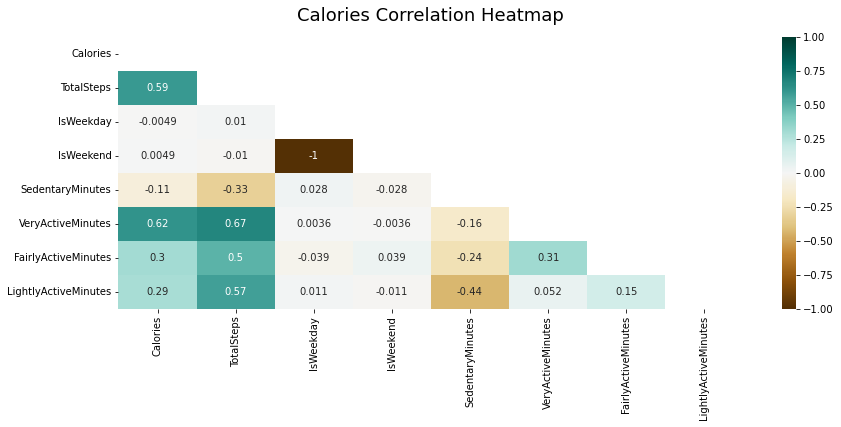

In [253]:
data = activity[['Calories','TotalSteps', 'IsWeekday', 'IsWeekend','SedentaryMinutes', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']]
plt.figure(figsize=(14, 5))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool_))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Calories Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# more steps and active minutes can burn more calories. strong correlation 
# sedentary minutes is positive correlation with weekday.

In [ ]:
# Clean data. Drop LoggedActivitiesDistance and SedentaryActiveDistance with values 0
import pandas as pd
import numpy as np
activity.drop(["LoggedActivitiesDistance"],axis=1)

# 3. Weight Analysis

BMI is a measurement of a person's leanness or corpulence based on their height and weight, taking age into consideration.
Specifically, the value obtained from the calculation of BMI is used to categorize whether a person is underweight, normal weight, overweight, or obese depending on what range the value falls between.

Healthy BMI range: 18.5 kg/m2 - 25 kg/m2
Healthy weight for the height: 59.9 kgs - 81.0 kgs
Ponderal Index: 11.1 kg/m3

In [142]:
from bs4 import BeautifulSoup

import requests
import json

import csv

In [143]:
# find resourse of BMI meanning and BMI table for Adult from WHO

with open('BMI Calculator.html') as html_file:
    url = BeautifulSoup(html_file,'lxml')
    
    print(url.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   BMI Calculator
  </title>
  <meta content="Free Body Mass Index calculator gives out the BMI value and categorizes BMI based on provided information from WHO and CDC for both adults and children." name="description"/>
  <link href="/style.css" rel="stylesheet"/>
  <script async="" src="//d26tpo4cm8sb6k.cloudfront.net/js/common.js">
  </script>
  <link href="//d26tpo4cm8sb6k.cloudfront.net/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="//d26tpo4cm8sb6k.cloudfront.net/icon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="//d26tpo4cm8sb6k.cloudfront.net/icon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/manifest.json" rel="manifest"/>
 </head>
 <body>
  <div id="headerout">
   <div id="header">
    <div id="logo">
     <a href="/">
      <img height="22" src="//d26tpo4cm8sb6k.cloudfront.net/img/svg/calculator-white.svg" width="208"/>
     </a>
    </div>
   </div

In [144]:
with open('BMI Calculator.html') as html_file:
    url=BeautifulSoup(html_file,'lxml')

for para in url.find_all('p'):
    print(para.get_text())

The Body Mass Index (BMI) Calculator can be used to calculate BMI value and corresponding weight status while taking age into consideration. Use the "Metric Units" tab for the International System of Units or the "Other Units" tab to convert units into either US or metric units. Note that the calculator also computes the Ponderal Index in addition to BMI, both of which are discussed below in detail.
BMI is a measurement of a person's leanness or corpulence based on their height and weight, and is intended to quantify tissue mass. It is widely used as a general indicator of whether a person has a healthy body weight for their height. Specifically, the value obtained from the calculation of BMI is used to categorize whether a person is underweight, normal weight, overweight, or obese depending on what range the value falls between. These ranges of BMI vary based on factors such as region and age, and are sometimes further divided into subcategories such as severely underweight or very se

In [145]:
with open('BMI Calculator.html') as html_file:
    url = BeautifulSoup(html_file,'lxml')

table = url.find('table',class_='cinfoT')
print(table)

<table align="center" class="cinfoT">
<tr><td class="cinfoHd">Category</td><td class="cinfoHdL">BMI range - kg/m<sup>2</sup></td></tr>
<tr><td>Severe Thinness</td><td class="cinfoBodL">&lt; 16</td></tr>
<tr><td>Moderate Thinness</td><td class="cinfoBodL">16 - 17</td></tr>
<tr><td>Mild Thinness</td><td class="cinfoBodL">17 - 18.5</td></tr>
<tr><td>Normal</td><td class="cinfoBodL">18.5 - 25</td></tr>
<tr><td>Overweight</td><td class="cinfoBodL">25 - 30</td></tr>
<tr><td>Obese Class I</td><td class="cinfoBodL">30 - 35</td></tr>
<tr><td>Obese Class II</td><td class="cinfoBodL">35 - 40</td></tr>
<tr><td>Obese Class III</td><td class="cinfoBodL">&gt; 40</td></tr>
</table>


In [146]:
# Resource from url?
weight=pd.read_csv('weightLogInfo.csv')
weight

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [147]:
# check if there is a missing data
# Fat has 65 missing values 
weight.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [149]:
weight.shape

(67, 8)

In [150]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [151]:
# Fill missing values with median
weight['Fat'] = weight['Fat'].fillna(weight['Fat'].median())
weight['Fat']

0     22.0
1     23.5
2     23.5
3     23.5
4     23.5
      ... 
62    23.5
63    23.5
64    23.5
65    23.5
66    23.5
Name: Fat, Length: 67, dtype: float64

In [152]:
print(weight)

            Id                   Date    WeightKg  WeightPounds   Fat  \
0   1503960366   5/2/2016 11:59:59 PM   52.599998    115.963147  22.0   
1   1503960366   5/3/2016 11:59:59 PM   52.599998    115.963147  23.5   
2   1927972279   4/13/2016 1:08:52 AM  133.500000    294.317120  23.5   
3   2873212765  4/21/2016 11:59:59 PM   56.700001    125.002104  23.5   
4   2873212765  5/12/2016 11:59:59 PM   57.299999    126.324875  23.5   
..         ...                    ...         ...           ...   ...   
62  8877689391    5/6/2016 6:43:35 AM   85.000000    187.392923  23.5   
63  8877689391    5/8/2016 7:35:53 AM   85.400002    188.274775  23.5   
64  8877689391    5/9/2016 6:39:44 AM   85.500000    188.495234  23.5   
65  8877689391   5/11/2016 6:51:47 AM   85.400002    188.274775  23.5   
66  8877689391   5/12/2016 6:42:53 AM   84.000000    185.188300  23.5   

          BMI  IsManualReport          LogId  
0   22.650000            True  1462233599000  
1   22.650000            True

In [153]:
weight['Id']=weight['Id'].astype(str)
weight['Id']

0     1503960366
1     1503960366
2     1927972279
3     2873212765
4     2873212765
         ...    
62    8877689391
63    8877689391
64    8877689391
65    8877689391
66    8877689391
Name: Id, Length: 67, dtype: object

In [154]:
# double check any missing values 
weight.isnull().sum()

Id                0
Date              0
WeightKg          0
WeightPounds      0
Fat               0
BMI               0
IsManualReport    0
LogId             0
dtype: int64

In [155]:
# BMI 
users_wgt = weight[['Id','BMI']]
users_wgt = users_wgt.groupby('Id',as_index=False).max()
users_wgt

,Id,BMI
0,1503960366,22.650000
1,1927972279,47.540001
2,2873212765,21.690001
3,4319703577,27.450001
4,4558609924,27.459999
5,5577150313,28.000000
6,6962181067,24.389999
7,8877689391,25.680000


In [ ]:
# merge BMI

In [224]:
bmi_activity = slp_activity.merge(users_wgt,on='Id',how='left')
bmi_activity

,Id,VeryActiveMinutes,TotalTimeInBed,BMI
0,1503960366,78,712.0,22.650000
1,1624580081,186,NaN,NaN
2,1644430081,51,961.0,NaN
3,1844505072,2,961.0,NaN
4,1927972279,16,775.0,47.540001
5,2022484408,104,NaN,NaN
6,2026352035,3,607.0,NaN
7,2320127002,20,69.0,NaN
8,2347167796,66,602.0,NaN
9,2873212765,75,NaN,21.690001


In [225]:
# merge SedentaryMinutes

sed_activity = bmi_activity.merge(users_sed,on='Id',how='left')
print(sed_activity)

            Id  VeryActiveMinutes  TotalTimeInBed        BMI  SedentaryMinutes
0   1503960366                 78           712.0  22.650000              1440
1   1624580081                186             NaN        NaN              1349
2   1644430081                 51           961.0        NaN              1402
3   1844505072                  2           961.0        NaN              1440
4   1927972279                 16           775.0  47.540001              1440
5   2022484408                104             NaN        NaN              1305
6   2026352035                  3           607.0        NaN              1062
7   2320127002                 20            69.0        NaN              1400
8   2347167796                 66           602.0        NaN              1011
9   2873212765                 75             NaN  21.690001              1302
10  3372868164                 24             NaN        NaN              1234
11  3977333714                 50           626.0   

In [226]:
sed_activity.isnull().sum()

Id                    0
VeryActiveMinutes     0
TotalTimeInBed        9
BMI                  25
SedentaryMinutes      0
dtype: int64

In [186]:
25/33*100

75.75757575757575

In [227]:
sed_activity.fillna(sed_activity['BMI'].mean())

,Id,VeryActiveMinutes,TotalTimeInBed,BMI,SedentaryMinutes
0,1503960366,78,712.0000,22.650000,1440
1,1624580081,186,28.1075,28.107500,1349
2,1644430081,51,961.0000,28.107500,1402
3,1844505072,2,961.0000,28.107500,1440
4,1927972279,16,775.0000,47.540001,1440
5,2022484408,104,28.1075,28.107500,1305
6,2026352035,3,607.0000,28.107500,1062
7,2320127002,20,69.0000,28.107500,1400
8,2347167796,66,602.0000,28.107500,1011
9,2873212765,75,28.1075,21.690001,1302


/Users/szuyingpan/opt/anaconda3/lib/python3.9/site-packages/seaborn/relational.py:608: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scout = ax.scatter(scout_x, scout_y, **kws)
/Users/szuyingpan/opt/anaconda3/lib/python3.9/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
/Users/szuyingpan/opt/anaconda3/lib/python3.9/site-packages/seaborn/relational.py:608: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scout = ax.scatter(scout_x, scout_y, **kws)
/Users/szuyingpan/opt/anaconda3/lib/python3.

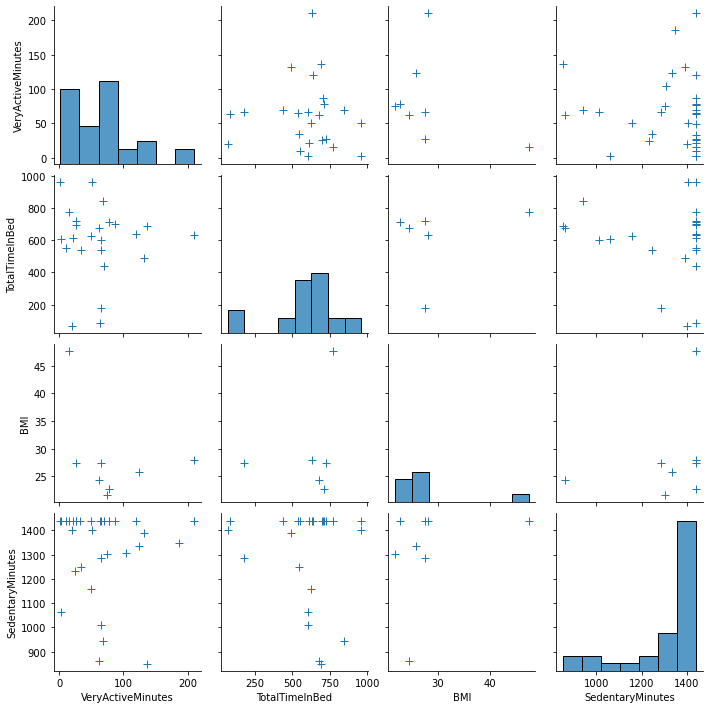

In [228]:
sns.pairplot(sed_activity, kind="scatter", markers="+", plot_kws=dict(s=50, edgecolor="b", linewidth=1))
plt.show()

In [229]:
sed_activity.corr()

,VeryActiveMinutes,TotalTimeInBed,BMI,SedentaryMinutes
VeryActiveMinutes,1.000000,-0.030066,-0.344976,-0.082291
TotalTimeInBed,-0.030066,1.000000,0.255383,-0.135985
BMI,-0.344976,0.255383,1.000000,0.301619
SedentaryMinutes,-0.082291,-0.135985,0.301619,1.000000


In [ ]:
# There is no correlation between VeryActiveMinutes and TotalTimeInBed.  
# BMI is correlated with SedentaryMinutes and TotalTimeInBed. 